In [1]:
import sys
sys.path.insert(0, '../..')  # Adjust path if needed
import omama as O
import time

In [2]:
omama_loader = O.OmamaLoader()
data = O.Data(data_loader=omama_loader, load_cache=True)

Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>


In [3]:
img1 = O.DataHelper.get(image='DXm.2.25.109014078025094589871377199850974108348')  
img2 = O.DataHelper.get(image='DXm.2.25.117830202126160255064401273204602625252')  
img3 = O.DataHelper.get(image='DXm.2.25.148577024255736600686005953259466994427')  
img4 = O.DataHelper.get(image='DXm.2.25.247304909819102291895286142667193213554')

In [4]:
pred_api = O.DeepSight.run([img1, img2, img3, img4], timing=True)

Time to parse SOP UIDs:  9.059906005859375e-06
Time to check cache:  0.9866440296173096
Running DeepSight on 2 cases, please be patient...
Time to update cache:  3.176968574523926
...took 60.362370014190674


Showing API Prediction for 2.25.109014078025094589871377199850974108348
type of data:  <class 'omama.data.Data'>
bb: [216, 1505, 847, 1924]
Showing API Prediction for 2.25.117830202126160255064401273204602625252
type of data:  <class 'omama.data.Data'>
bb: [1618, 779, 1882, 1072]
Showing API Prediction for 2.25.148577024255736600686005953259466994427
type of data:  <class 'omama.data.Data'>
bb: [923, 1264, 1235, 1524]
Showing API Prediction for 2.25.247304909819102291895286142667193213554
type of data:  <class 'omama.data.Data'>
bb: [118, 918, 455, 1119]


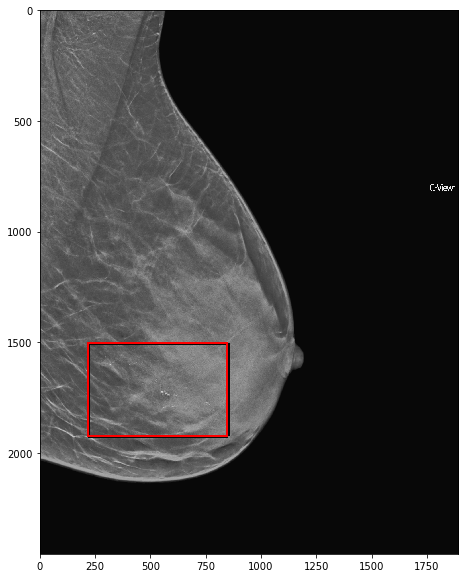

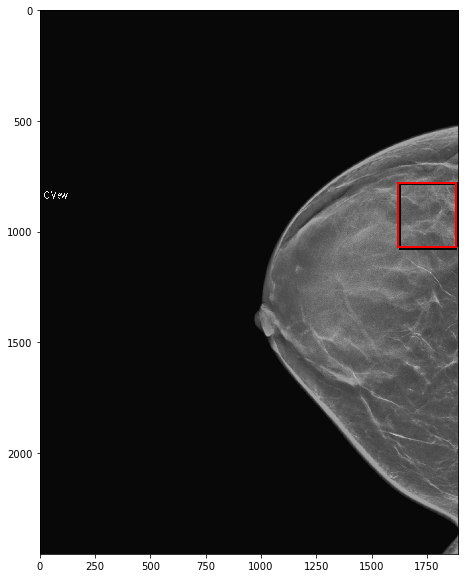

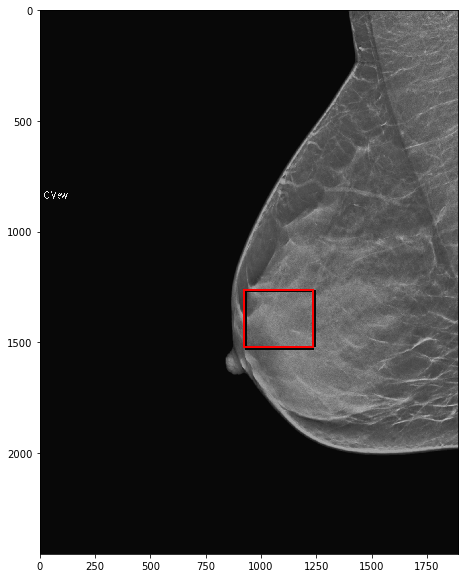

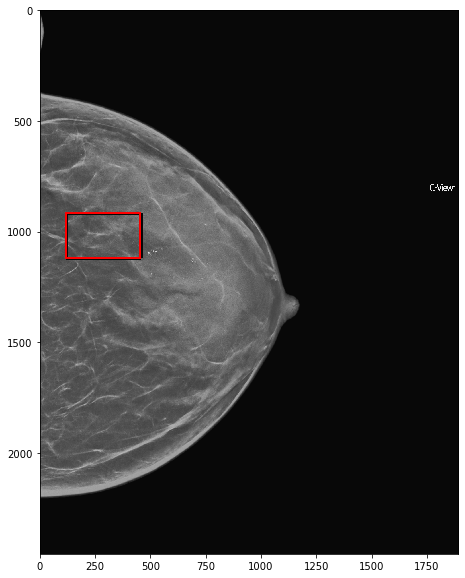

In [5]:
for img in [img1, img2, img3, img4]:
    sop_uid = img.SOPInstanceUID
    if sop_uid in pred_api:
        print(f"Showing API Prediction for {sop_uid}")
        O.DataHelper.view(image=img, roi_coords=pred_api[sop_uid]['coords'])
    else:
        print(f"No API Prediction for {sop_uid}")

In [7]:
import json

with open("/raid/mpsych/OMAMA/2025/PLAYGROUND/out4/2.25.323923627361529094490097986242932216200/results_full.json", "r") as f:
    pred_shell = json.load(f)

In [8]:
for img in [img1, img2, img3, img4]:
    sop = img.SOPInstanceUID
    api_score = pred_api[sop]['score'] if sop in pred_api else 'N/A'
    
    shell_score = 'N/A'
    if 'results' in pred_shell and 'dicom_results' in pred_shell['results']:
        shell_data = pred_shell['results']['dicom_results'].get(sop)
        if shell_data:
            shell_score = shell_data['none'][0]['score']
    
    print(f"SOP: {sop}")
    print(f"  ➤ API Score:   {api_score}")
    print(f"  ➤ Shell Score: {shell_score}")
    print("----------")

SOP: 2.25.109014078025094589871377199850974108348
  ➤ API Score:   0.6983281970024109
  ➤ Shell Score: 0.6983281970024109
----------
SOP: 2.25.117830202126160255064401273204602625252
  ➤ API Score:   0.06530214101076126
  ➤ Shell Score: 0.06530214101076126
----------
SOP: 2.25.148577024255736600686005953259466994427
  ➤ API Score:   0.10501881688833237
  ➤ Shell Score: 0.10501881688833237
----------
SOP: 2.25.247304909819102291895286142667193213554
  ➤ API Score:   0.5878492593765259
  ➤ Shell Score: 0.5878492593765259
----------


In [9]:
study_results = pred_shell['results']['study_results']
print("Shell Study-Level Scores:")
print(f"  ➤ Left Breast (L): {study_results['L']}")
print(f"  ➤ Right Breast (R): {study_results['R']}")
print(f"  ➤ Total: {study_results['total']}")

Shell Study-Level Scores:
  ➤ Left Breast (L): {'score': 0.6430887281894684, 'category': 1, 'category_name': 'Suspicious'}
  ➤ Right Breast (R): {'score': 0.08516047894954681, 'category': 0, 'category_name': ''}
  ➤ Total: {'score': 0.6430887281894684, 'category': 1, 'category_name': 'Suspicious', 'postprocessed_percentile_score': 96.90967915879105}
